In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pre_process(dataset, col_label):
    
    x = dataset.iloc[:,0:col_label]
    ux, sx = x.mean(axis=0),x.std(axis=0,ddof=0)
    x = (x - ux)/sx
    x = np.hstack((np.ones(x.shape[0])[np.newaxis].T,x))
    
    y = dataset.iloc[:,col_label]
    #uy, sy = y.mean(axis=0), y.std(axis=0,ddof=0)
    #y = (y - uy)/sy
    y = np.array(y)[np.newaxis].T
    
    return x,y

In [3]:
def logistic(x):
    z = np.array(x, dtype= float)
    return 1/(1+np.exp(-(z)))

In [4]:
def ei_logistic(w,x,y):
    h = logistic(np.dot(x,w))
    return (y-h)*h*(1-h)

In [5]:
def err_logistic(w,x,y):
    return np.sum((y - logistic(np.dot(x,w)))**2,axis = 0)

In [6]:
def GD_(x,y, iterations, alfa):
    n = x.shape[0]
    d = x.shape[1]
    
    w = np.array([np.zeros(d)]).T
    loss = []
    
    while(iterations != 0):
        w = w + alfa*(np.sum(ei_logistic(w,x,y)*x,axis=0)[np.newaxis].T)#/n
        iterations = iterations - 1
        loss.append(err_logistic(w,x,y)[0])
        
    return w,loss

In [7]:
def avaliation(w,test):
    xtest,ytest = pre_process(test, 30)
    
    predict = logistic(np.dot(xtest,w))
    predict[predict<0.5]=0.0
    predict[predict>=0.5]=1.0
    
    summ = 0
    
    for i in range(test.shape[0]):
        if(predict[i]==ytest[i]): summ += 1
        
    return summ/test.shape[0]

In [8]:
data = pd.read_csv("wdbc.data",header=None)
df = pd.DataFrame(data, columns = [i for i in range(32)])
df = df[[i for i in range(31) if i != 1] + [1]]

df[1] = df[1].mask(df[1]=='B',1)
df[1] = df[1].mask(df[1]=='M',0)

In [9]:
train_len = int(0.7*df.shape[0])
train = df[0:train_len]
test = df[train_len:] 
test = test.reset_index(drop=True)
print(train.shape)

(398, 31)


In [10]:
x, y = pre_process(train, 30)

In [39]:
iterations = 600
alfa = 0.1

In [40]:
w, loss= GD_(x, y, iterations, alfa)

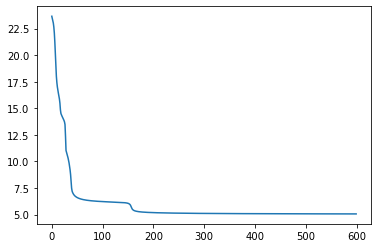

In [41]:
plt.plot(range(iterations),loss)
plt.show()

In [42]:
avaliation(w,test)

0.9122807017543859